# Gene Flow Stats

In [107]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import sqrt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)


In [13]:
%matplotlib inline

In [3]:
ctrl = pd.read_csv("Ctrl_sum_matings_ratio_gen1.dat")
scenA = pd.read_csv("ScenA_sum_matings_ratio_gen1.dat")
scenB = pd.read_csv("ScenB_sum_matings_ratio_gen1.dat")
scenC = pd.read_csv("ScenC_sum_matings_ratio_gen1.dat")
scenD = pd.read_csv("ScenD_sum_matings_ratio_gen1.dat")
scenE = pd.read_csv("ScenE_sum_matings_ratio_gen1.dat")

In [4]:
z_stat, p_val = stats.ranksums(ctrl, scenA)  
print z_stat
print p_val
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

6.53932044362
6.17989868275e-11
reject null of sameness (different)


In [5]:
z_stat, p_val = stats.ranksums(ctrl, scenB)  
print z_stat
print p_val
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

6.48074069841
9.12734179929e-11
reject null of sameness (different)


In [6]:
z_stat, p_val = stats.ranksums(ctrl, scenC)  
print z_stat
print p_val
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

6.03379306403
1.60155132392e-09
reject null of sameness (different)


In [7]:
z_stat, p_val = stats.ranksums(ctrl, scenD)  
print z_stat
print p_val
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

6.19719190674
5.74794027186e-10
reject null of sameness (different)


In [8]:
z_stat, p_val = stats.ranksums(ctrl, scenE)  
print z_stat
print p_val
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

6.44881586738
1.12727418461e-10
reject null of sameness (different)


In [9]:
f_stat, p_val = stats.f_oneway(ctrl, scenA, scenB, scenC, scenD, scenE)
print f_stat
print p_val

if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

[ 55.29619626]
[  1.57688100e-33]
reject null of sameness (different)


In [10]:
f_stat, p_val = stats.f_oneway(scenA, scenB, scenC, scenD, scenE)
print f_stat
print p_val 
if p_val < (0.05/5): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

[ 2.90655202]
[ 0.02399774]
can't reject null of sameness


## Fitness and Viability Stats

In [14]:
import scipy  
from scipy import stats
import scikits.bootstrap as bootstrap 

In [18]:
%ls *fitness*


ScenA_recombinant_fitness.csv  ScenD_Drift_recombinant_fitness.csv
ScenB_recombinant_fitness.csv  ScenE_recombinant_fitness.csv
ScenC_recombinant_fitness.csv


In [21]:
%ls *viab*

ScenA_recombinant_viability.csv  ScenD_Drift_recombinant_viability.csv
ScenB_recombinant_viability.csv  ScenE_recombinant_viability.csv
ScenC_recombinant_viability.csv  recomb_viab.sh


In [39]:
recomb_header = ["BatchA", 
"BatchB",
"BatchA_Sampled", 
"BatchB_Sampled", 
"Recombination", 
"BatchA_Sampled_Viable",
"BatchB_Sampled_Viable",
"Recombination__Viable",
"BatchA_Sampled1", 
"BatchA_Sampled2", 
"RecombinationAA", 
"BatchA_Sampled1_Viable", 
"BatchA_Sampled2_Viable", 
"RecombinationAA_Viable", 
"BatchB_Sampled1", 
"BatchB_Sampled2", 
"RecombinationBB", 
"BatchB_Sampled1_Viable", 
"BatchB_Sampled2_Viable", 
"RecombinationBB_Viable"] 


scenA_fitness = pd.read_csv("ScenA_recombinant_fitness.csv", names=recomb_header)
scenB_fitness = pd.read_csv("ScenB_recombinant_fitness.csv", names=recomb_header)
scenC_fitness = pd.read_csv("ScenC_recombinant_fitness.csv", names=recomb_header)
scenD_fitness = pd.read_csv("ScenD_Drift_recombinant_fitness.csv", names=recomb_header)
scenE_fitness = pd.read_csv("ScenE_recombinant_fitness.csv", names=recomb_header)

In [43]:
A_AB_ci = bootstrap.ci(data=scenA_fitness['Recombination'], statfunction=scipy.mean, n_samples=10000)
A_AA_ci = bootstrap.ci(data=scenA_fitness['RecombinationAA'], statfunction=scipy.mean, n_samples=10000)
A_BB_ci = bootstrap.ci(data=scenA_fitness['RecombinationBB'], statfunction=scipy.mean, n_samples=10000)
A_vals = [scenA_fitness['Recombination'].mean(), 
              scenA_fitness['RecombinationAA'].mean(), 
              scenA_fitness['RecombinationBB'].mean(),
              A_AB_ci[1]-A_AB_ci[0], 
              A_AA_ci[1]-A_AA_ci[0], 
              A_BB_ci[1]-A_BB_ci[0]]
A_vals

[0.24344313333333334,
 0.25240540000000006,
 0.25389450000000002,
 0.014073633333333335,
 0.019210099999999869,
 0.022036666666666677]

In [44]:
B_AB_ci = bootstrap.ci(data=scenB_fitness['Recombination'], statfunction=scipy.mean, n_samples=10000)
B_AA_ci = bootstrap.ci(data=scenB_fitness['RecombinationAA'], statfunction=scipy.mean, n_samples=10000)
B_BB_ci = bootstrap.ci(data=scenB_fitness['RecombinationBB'], statfunction=scipy.mean, n_samples=10000)
B_vals = [scenB_fitness['Recombination'].mean(), 
              scenB_fitness['RecombinationAA'].mean(), 
              scenB_fitness['RecombinationBB'].mean(),
              B_AB_ci[1]-B_AB_ci[0], 
              B_AA_ci[1]-B_AA_ci[0], 
              B_BB_ci[1]-B_BB_ci[0]]
B_vals

[0.23894365517241378,
 0.26203679310344835,
 0.2483525172413793,
 0.012897793103448296,
 0.025264034482758657,
 0.023957896551724117]

In [46]:
C_AB_ci = bootstrap.ci(data=scenC_fitness['Recombination'], statfunction=scipy.mean, n_samples=10000)
C_AA_ci = bootstrap.ci(data=scenC_fitness['RecombinationAA'], statfunction=scipy.mean, n_samples=10000)
C_BB_ci = bootstrap.ci(data=scenC_fitness['RecombinationBB'], statfunction=scipy.mean, n_samples=10000)
C_vals = [scenC_fitness['Recombination'].mean(), 
              scenC_fitness['RecombinationAA'].mean(), 
              scenC_fitness['RecombinationBB'].mean(),
              C_AB_ci[1]-C_AB_ci[0], 
              C_AA_ci[1]-C_AA_ci[0], 
              C_BB_ci[1]-C_BB_ci[0]]
C_vals

[0.24790913793103447,
 0.26378517241379312,
 0.26660251724137934,
 0.01622824137931031,
 0.02091103448275855,
 0.023812379310344856]

In [47]:
D_AB_ci = bootstrap.ci(data=scenD_fitness['Recombination'], statfunction=scipy.mean, n_samples=10000)
D_AA_ci = bootstrap.ci(data=scenD_fitness['RecombinationAA'], statfunction=scipy.mean, n_samples=10000)
D_BB_ci = bootstrap.ci(data=scenD_fitness['RecombinationBB'], statfunction=scipy.mean, n_samples=10000)
D_vals = [scenD_fitness['Recombination'].mean(), 
              scenD_fitness['RecombinationAA'].mean(), 
              scenD_fitness['RecombinationBB'].mean(),
              D_AB_ci[1]-D_AB_ci[0], 
              D_AA_ci[1]-D_AA_ci[0], 
              D_BB_ci[1]-D_BB_ci[0]]
D_vals

[0.24278299999999994,
 0.24948136666666665,
 0.25831013333333336,
 0.013703800000000071,
 0.01716970000000001,
 0.027272533333333321]

In [48]:
E_AB_ci = bootstrap.ci(data=scenE_fitness['Recombination'], statfunction=scipy.mean, n_samples=10000)
E_AA_ci = bootstrap.ci(data=scenE_fitness['RecombinationAA'], statfunction=scipy.mean, n_samples=10000)
E_BB_ci = bootstrap.ci(data=scenE_fitness['RecombinationBB'], statfunction=scipy.mean, n_samples=10000)
E_vals = [scenE_fitness['Recombination'].mean(), 
              scenE_fitness['RecombinationAA'].mean(), 
              scenE_fitness['RecombinationBB'].mean(),
              E_AB_ci[1]-E_AB_ci[0], 
              E_AA_ci[1]-E_AA_ci[0], 
              E_BB_ci[1]-E_BB_ci[0]]
E_vals

[0.24251813793103449,
 0.25888210344827589,
 0.26457558620689658,
 0.020631068965517224,
 0.021565034482758594,
 0.027247586206896601]

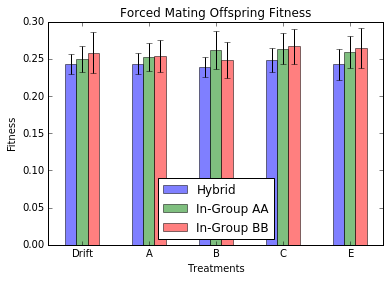

In [56]:
sectioned_fitness = pd.DataFrame([D_vals, A_vals, B_vals, C_vals, E_vals], 
                        columns = ['Hybrid', 'In-Group AA', 'In-Group BB', 'AB_err', 'AA_err', 'BB_err'],
                        index = ['Drift', 'A', 'B', 'C', 'E'])
ax = sectioned_fitness[['Hybrid', 'In-Group AA', 'In-Group BB']].plot(kind='bar', 
                                                       yerr=sectioned_fitness[['AB_err','AA_err', 'BB_err']].values.T,
                                                       alpha = 0.5,
                                                       #ylim=[0,12],
                                                        rot=0,
                                                        title="Forced Mating Offspring Fitness",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatments")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig("recombination_fitness.png")

In [83]:
z_stat, p_val = stats.ranksums(scenA_fitness['Recombination'], scenA_fitness['RecombinationAA'])  
print z_stat
print p_val
if p_val < (0.05/2): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-0.561808165925
0.574246727832
can't reject null of sameness


In [84]:
z_stat, p_val = stats.ranksums(scenA_fitness['Recombination'], scenA_fitness['RecombinationBB'])  
print z_stat
print p_val
if p_val < (0.05/2): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-0.739221270955
0.459772646549
can't reject null of sameness


In [85]:
f_stat, p_val = stats.f_oneway(scenA_fitness['Recombination'], 
                               scenA_fitness['RecombinationAA'], 
                               scenA_fitness['RecombinationBB'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

1.37704390383
0.257767500505
can't reject null of sameness


In [86]:
f_stat, p_val = stats.f_oneway(scenB_fitness['Recombination'], 
                               scenB_fitness['RecombinationAA'], 
                               scenB_fitness['RecombinationBB'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

4.4054388864
0.0151557366601
reject null of sameness (different)


In [139]:
z_stat, p_val = stats.ranksums(scenB_fitness['Recombination'], scenB_fitness['RecombinationAA'])  
print z_stat
print p_val
if p_val < (0.05/2): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

-2.55818837806
0.0105219076842
reject null of sameness (different)


In [140]:
z_stat, p_val = stats.ranksums(scenB_fitness['Recombination'], scenB_fitness['RecombinationBB'])  
print z_stat
print p_val
if p_val < (0.05/2): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

0.00777564856555
0.993795992576
can't reject null of sameness


In [87]:
f_stat, p_val = stats.f_oneway(scenC_fitness['Recombination'], 
                               scenC_fitness['RecombinationAA'], 
                               scenC_fitness['RecombinationBB'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

3.56799272944
0.03256525378
can't reject null of sameness


In [88]:
f_stat, p_val = stats.f_oneway(scenD_fitness['Recombination'], 
                               scenD_fitness['RecombinationAA'], 
                               scenD_fitness['RecombinationBB'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

2.28397231807
0.107955983616
can't reject null of sameness


In [89]:
f_stat, p_val = stats.f_oneway(scenE_fitness['Recombination'], 
                               scenE_fitness['RecombinationAA'], 
                               scenE_fitness['RecombinationBB'])
print f_stat
print p_val

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

3.58947634402
0.0319269063235
can't reject null of sameness


In [71]:
recomb_header = ["BatchA", 
"BatchB",
"BatchA_Sampled", 
"BatchB_Sampled", 
"Recombination", 
"BatchA_Sampled_Viable",
"BatchB_Sampled_Viable",
"Recombination__Viable",
"BatchA_Sampled1", 
"BatchA_Sampled2", 
"RecombinationAA", 
"BatchA_Sampled1_Viable", 
"BatchA_Sampled2_Viable", 
"RecombinationAA_Viable", 
"BatchB_Sampled1", 
"BatchB_Sampled2", 
"RecombinationBB", 
"BatchB_Sampled1_Viable", 
"BatchB_Sampled2_Viable", 
"RecombinationBB_Viable"] 

scenA_viab = pd.read_csv("ScenA_recombinant_viability.csv")#, names=recomb_header)
scenB_viab = pd.read_csv("ScenB_recombinant_viability.csv")#, names=recomb_header)
scenC_viab = pd.read_csv("ScenC_recombinant_viability.csv")#, names=recomb_header)
scenD_viab = pd.read_csv("ScenD_Drift_recombinant_viability.csv")#, names=recomb_header)
scenE_viab = pd.read_csv("ScenE_recombinant_viability.csv")#, names=recomb_header)

In [73]:
scenA_viab['Recombination_']

0     0.942747
1     0.919440
2     0.919470
3     0.918021
4     0.929767
5     0.963979
6     0.939176
7     0.950429
8     0.911261
9     0.942811
10    0.913589
11    0.893566
        ...   
18    0.966272
19    0.943060
20    0.956113
21    0.931473
22    0.875943
23    0.888490
24    0.943484
25    0.941944
26    0.738194
27    0.937539
28    0.884558
29    0.906889
Name: Recombination_, dtype: float64

In [93]:
A_AB_ci = bootstrap.ci(data=scenA_viab['Recombination__Viable'], statfunction=scipy.mean, n_samples=10000)
A_AA_ci = bootstrap.ci(data=scenA_viab['RecombinationAA_Viable'], statfunction=scipy.mean, n_samples=10000)
A_BB_ci = bootstrap.ci(data=scenA_viab['RecombinationBB_Viable'], statfunction=scipy.mean, n_samples=10000)
A_vals = [scenA_viab['Recombination__Viable'].mean(), 
              scenA_viab['RecombinationAA_Viable'].mean(), 
              scenA_viab['RecombinationBB_Viable'].mean(),
              A_AB_ci[1]-A_AB_ci[0], 
              A_AA_ci[1]-A_AA_ci[0], 
              A_BB_ci[1]-A_BB_ci[0]]
A_vals

[0.96799456666666683,
 0.99203583333333312,
 0.99211396666666662,
 0.035844500000000168,
 0.0036874000000002294,
 0.0051822000000002477]

In [95]:
B_AB_ci = bootstrap.ci(data=scenB_viab['Recombination__Viable'], statfunction=scipy.mean, n_samples=10000)
B_AA_ci = bootstrap.ci(data=scenB_viab['RecombinationAA_Viable'], statfunction=scipy.mean, n_samples=10000)
B_BB_ci = bootstrap.ci(data=scenB_viab['RecombinationBB_Viable'], statfunction=scipy.mean, n_samples=10000)
B_vals = [scenB_viab['Recombination__Viable'].mean(), 
              scenB_viab['RecombinationAA_Viable'].mean(), 
              scenB_viab['RecombinationBB_Viable'].mean(),
              B_AB_ci[1]-B_AB_ci[0], 
              B_AA_ci[1]-B_AA_ci[0], 
              B_BB_ci[1]-B_BB_ci[0]]
B_vals

[0.95671175862068947,
 0.98857379310344839,
 0.99175141379310361,
 0.030912310344827554,
 0.012277724137930934,
 0.0035959999999999326]

In [96]:
C_AB_ci = bootstrap.ci(data=scenC_viab['Recombination__Viable'], statfunction=scipy.mean, n_samples=10000)
C_AA_ci = bootstrap.ci(data=scenC_viab['RecombinationAA_Viable'], statfunction=scipy.mean, n_samples=10000)
C_BB_ci = bootstrap.ci(data=scenC_viab['RecombinationBB_Viable'], statfunction=scipy.mean, n_samples=10000)
C_vals = [scenC_viab['Recombination__Viable'].mean(), 
              scenC_viab['RecombinationAA_Viable'].mean(), 
              scenC_viab['RecombinationBB_Viable'].mean(),
              C_AB_ci[1]-C_AB_ci[0], 
              C_AA_ci[1]-C_AA_ci[0], 
              C_BB_ci[1]-C_BB_ci[0]]
C_vals

[0.95396379310344814,
 0.99035017241379297,
 0.99248706896551719,
 0.042138103448275954,
 0.0047240689655171364,
 0.0040778275862068947]

In [97]:
D_AB_ci = bootstrap.ci(data=scenD_viab['Recombination__Viable'], statfunction=scipy.mean, n_samples=10000)
D_AA_ci = bootstrap.ci(data=scenD_viab['RecombinationAA_Viable'], statfunction=scipy.mean, n_samples=10000)
D_BB_ci = bootstrap.ci(data=scenD_viab['RecombinationBB_Viable'], statfunction=scipy.mean, n_samples=10000)
D_vals = [scenD_viab['Recombination__Viable'].mean(), 
              scenD_viab['RecombinationAA_Viable'].mean(), 
              scenD_viab['RecombinationBB_Viable'].mean(),
              D_AB_ci[1]-D_AB_ci[0], 
              D_AA_ci[1]-D_AA_ci[0], 
              D_BB_ci[1]-D_BB_ci[0]]
D_vals

[0.96927146666666664,
 0.99302279999999998,
 0.99293303333333338,
 0.035262033333333442,
 0.0037866666666667159,
 0.0033765333333332093]

In [98]:
E_AB_ci = bootstrap.ci(data=scenE_viab['Recombination__Viable'], statfunction=scipy.mean, n_samples=10000)
E_AA_ci = bootstrap.ci(data=scenE_viab['RecombinationAA_Viable'], statfunction=scipy.mean, n_samples=10000)
E_BB_ci = bootstrap.ci(data=scenE_viab['RecombinationBB_Viable'], statfunction=scipy.mean, n_samples=10000)
E_vals = [scenE_viab['Recombination__Viable'].mean(), 
              scenE_viab['RecombinationAA_Viable'].mean(), 
              scenE_viab['RecombinationBB_Viable'].mean(),
              E_AB_ci[1]-E_AB_ci[0], 
              E_AA_ci[1]-E_AA_ci[0], 
              E_BB_ci[1]-E_BB_ci[0]]
E_vals

[0.94915282758620689,
 0.99260020689655171,
 0.99155648275862052,
 0.045864034482758442,
 0.003155586206896599,
 0.003693482758620692]

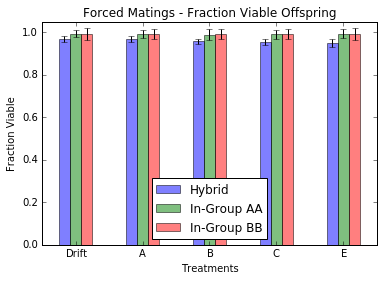

In [138]:
sectioned_viab = pd.DataFrame([D_vals, A_vals, B_vals, C_vals, E_vals], 
                        columns = ['Hybrid', 'In-Group AA', 'In-Group BB', 'AB_err', 'AA_err', 'BB_err'],
                        index = ['Drift', 'A', 'B', 'C', 'E'])
ax = sectioned_viab[['Hybrid', 'In-Group AA', 'In-Group BB']].plot(kind='bar', 
                                                       yerr=sectioned_fitness[['AB_err','AA_err', 'BB_err']].values.T,
                                                       alpha = 0.5,
                                                       ylim=[0,1.05],
                                                        rot=0,
                                                        title="Forced Matings - Fraction Viable Offspring",
                                                       error_kw=dict(ecolor='k'))
ax.set_xlabel("Treatments")
ax.set_ylabel("Fraction Viable")
fig = ax.get_figure()
fig.savefig("recombination_viability.png")

In [142]:
f_stat, p_val = stats.f_oneway(scenA_viab['Recombination__Viable'], 
                               scenA_viab['RecombinationAA_Viable'], 
                               scenA_viab['RecombinationBB_Viable'])

print f_stat
print p_val

print abs(scenA_viab['Recombination__Viable'].mean() - scenA_viab['RecombinationAA_Viable'].mean())
print abs(scenA_viab['Recombination__Viable'].mean() - scenA_viab['RecombinationBB_Viable'].mean())

cohens_d_AA = abs(scenA_viab['Recombination__Viable'].mean() - scenA_viab['RecombinationAA_Viable'].mean()) \
/ (sqrt((scenA_viab['Recombination__Viable'].std() ** 2 + scenA_viab['RecombinationAA_Viable'].std() ** 2) / 2))

cohens_d_BB = abs(scenA_viab['Recombination__Viable'].mean() - scenA_viab['RecombinationBB_Viable'].mean()) \
/ (sqrt((scenA_viab['Recombination__Viable'].std() ** 2 + scenA_viab['RecombinationBB_Viable'].std() ** 2) / 2))


print cohens_d_AA
print cohens_d_BB


if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

8.7819954719
0.000335709729814
0.0240412666667
0.0241194
0.772878702202
0.771496088488
reject null of sameness (different)


In [143]:
f_stat, p_val = stats.f_oneway(scenB_viab['Recombination__Viable'], 
                               scenB_viab['RecombinationAA_Viable'], 
                               scenB_viab['RecombinationBB_Viable'])
print f_stat
print p_val


print abs(scenB_viab['Recombination__Viable'].mean() - scenB_viab['RecombinationAA_Viable'].mean())
print abs(scenB_viab['Recombination__Viable'].mean() - scenB_viab['RecombinationBB_Viable'].mean())

cohens_d_AA = abs(scenB_viab['Recombination__Viable'].mean() - scenB_viab['RecombinationAA_Viable'].mean()) \
/ (sqrt((scenB_viab['Recombination__Viable'].std() ** 2 + scenB_viab['RecombinationAA_Viable'].std() ** 2) / 2))

cohens_d_BB = abs(scenB_viab['Recombination__Viable'].mean() - scenB_viab['RecombinationBB_Viable'].mean()) \
/ (sqrt((scenB_viab['Recombination__Viable'].std() ** 2 + scenB_viab['RecombinationBB_Viable'].std() ** 2) / 2))


print cohens_d_AA
print cohens_d_BB

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

16.1544943368
1.15870338705e-06
0.0318620344828
0.0350396551724
1.00844785723
1.1680906548
reject null of sameness (different)


In [144]:
f_stat, p_val = stats.f_oneway(scenC_viab['Recombination__Viable'], 
                               scenC_viab['RecombinationAA_Viable'], 
                               scenC_viab['RecombinationBB_Viable'])
print f_stat
print p_val

print  abs(scenC_viab['Recombination__Viable'].mean() - scenC_viab['RecombinationAA_Viable'].mean())
print  abs(scenC_viab['Recombination__Viable'].mean() - scenC_viab['RecombinationBB_Viable'].mean())

cohens_d_AA = abs(scenC_viab['Recombination__Viable'].mean() - scenC_viab['RecombinationAA_Viable'].mean()) \
/ (sqrt((scenC_viab['Recombination__Viable'].std() ** 2 + scenC_viab['RecombinationAA_Viable'].std() ** 2) / 2))

cohens_d_BB = abs(scenC_viab['Recombination__Viable'].mean() - scenC_viab['RecombinationBB_Viable'].mean()) \
/ (sqrt((scenC_viab['Recombination__Viable'].std() ** 2 + scenC_viab['RecombinationBB_Viable'].std() ** 2) / 2))


print cohens_d_AA
print cohens_d_BB

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

13.4174471447
8.77640256809e-06
0.0363863793103
0.0385232758621
0.938252317291
0.995119255622
reject null of sameness (different)


In [145]:
f_stat, p_val = stats.f_oneway(scenD_viab['Recombination__Viable'], 
                               scenD_viab['RecombinationAA_Viable'], 
                               scenD_viab['RecombinationBB_Viable'])
print f_stat
print p_val

print abs(scenD_viab['Recombination__Viable'].mean() - scenD_viab['RecombinationAA_Viable'].mean())
print abs(scenD_viab['Recombination__Viable'].mean() - scenD_viab['RecombinationBB_Viable'].mean())

cohens_d = abs(scenD_viab['Recombination__Viable'].mean() - scenD_viab['RecombinationAA_Viable'].mean()) \
/ (sqrt((scenD_viab['Recombination__Viable'].std() ** 2 + scenD_viab['RecombinationAA_Viable'].std() ** 2) / 2))
print cohens_d

cohens_d = abs(scenD_viab['Recombination__Viable'].mean() - scenD_viab['RecombinationBB_Viable'].mean()) \
/ (sqrt((scenD_viab['Recombination__Viable'].std() ** 2 + scenD_viab['RecombinationBB_Viable'].std() ** 2) / 2))
print cohens_d

if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

8.19680457934
0.000547787016706
0.0237513333333
0.0236615666667
0.744622148625
0.743024002382
reject null of sameness (different)


In [146]:
f_stat, p_val = stats.f_oneway(scenE_viab['Recombination__Viable'], 
                               scenE_viab['RecombinationAA_Viable'], 
                               scenE_viab['RecombinationBB_Viable'])
print f_stat
print p_val

print abs(scenE_viab['Recombination__Viable'].mean() - scenE_viab['RecombinationAA_Viable'].mean())
print abs(scenE_viab['Recombination__Viable'].mean() - scenE_viab['RecombinationBB_Viable'].mean())


cohens_d = abs(scenE_viab['Recombination__Viable'].mean() - scenE_viab['RecombinationAA_Viable'].mean()) \
/ (sqrt((scenE_viab['Recombination__Viable'].std() ** 2 + scenE_viab['RecombinationAA_Viable'].std() ** 2) / 2))
print cohens_d

cohens_d = abs(scenE_viab['Recombination__Viable'].mean() - scenE_viab['RecombinationBB_Viable'].mean()) \
/ (sqrt((scenE_viab['Recombination__Viable'].std() ** 2 + scenE_viab['RecombinationBB_Viable'].std() ** 2) / 2))
print cohens_d


if p_val < (0.05/3): #bonferroni
    print "reject null of sameness (different)"
else:
    print "can't reject null of sameness"

15.4356960649
1.95357852631e-06
0.0434473793103
0.0424036551724
1.04783541164
1.02181001885
reject null of sameness (different)


In [131]:
%ls *.png

recombination_fitness.png  recombination_viability.png
